## Building an RC frame using functions in opseestools v0.4

### Library import

In [1]:
from openseespy.opensees import *
import matplotlib.pyplot as plt
import opseestools.analisis as an
import opseestools.utilidades as ut
import opsvis as opsv
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Model creation

In [2]:
wipe()
model('basic','-ndm',2,'-ndf',3)

### Defining nodes using creategrid

#### Creategrid requires X y Y coordinates and creates the nodes

In [3]:
coordx = [0, 6.0, 10.0]
coordy = [0, 4.0, 7.0]
ut.creategrid(coordx,coordy)
fixY(0,1,1,1) 

### Defining materials

#### opseestools allows defining materials considering the Colombian standard NSR-10. The col_materials function accepts two types of materials: the first type is 'DES' which are very similar to what would be expected for special detailing according to ACI 318. The second type is 'DMO' which is a type of detailing used in Colombia in medium-risk zones

In [ ]:
fc = 28 # en MPa
fy = 420 # en MPa
tag_noconf, tag_conf, tag_acero = ut.col_materials(fc,fy) # by default tags are: unconfined concrete (102), confined (101), steel (100)

### Define beam and column sections

In [5]:
Bcol = 0.3 # base de la columna
Hcol = 0.3 # altura de la columna
Bvig = 0.3 # base de la viga
Hvig = 0.4 # altura de la viga
c = 0.05  # recubrimiento de las secciones
nFibCover, nFibCore, nFibZcore  = 8, 16, 10 # numero de fibras en zona no confinada, en Z (x) en zona confinada y Y (y) zona confinada
As4 = 0.000127 # area barra #4
As5 = 0.0002 # area barra #5

col30x30 = 101 # tag de la columna
vig30x40 = 201 # tag de la viga

ut.BuildRCSection(col30x30, Hcol, Bcol, c, c, tag_conf, tag_noconf, tag_acero , 4, As5, 4, As5, 4, As5, nFibCore, nFibZcore, nFibCover, nFibCover)
ut.BuildRCSection(vig30x40, Hvig, Bvig, c, c, tag_conf, tag_noconf, tag_acero , 3, As4, 4, As4, 2, 1e-10, nFibCore, nFibZcore, nFibCover, nFibCover)

# the BuildRCSection is a Python translation of the proc available at: https://opensees.berkeley.edu/wiki/index.php/OpenSees_Example_9._Build_%26_Analyze_a_Section_Example

beamIntegration('Lobatto',col30x30,col30x30,5)
beamIntegration('Lobatto',vig30x40,vig30x40,5)

### Create beam and column elements

#### Previous coordinates x and y must be entered as well as the sections of columns and beams. The command returns the tags of the columns and beams. The command is called create_elements.

In [6]:
tagcols,tagbeams = ut.create_elements(coordx,coordy,col30x30,vig30x40) 

### Loading beams

#### The function load_beams has as input the floor beam loads, the roof beam loads, and finally the tags of the beams. These must be the ones returned by the create_elements function.

In [7]:
ut.load_beams(-30,-20,tagbeams)

### Gravity analysis and model display

#### opseestools has a gravedad() function that performs static analyses

TypeError: plot_loads_2d() missing 7 required positional arguments: 'nep', 'fig_wi_he', 'fig_lbrt', 'fmt_model_loads', 'node_supports', 'truss_node_offset', and 'ax'

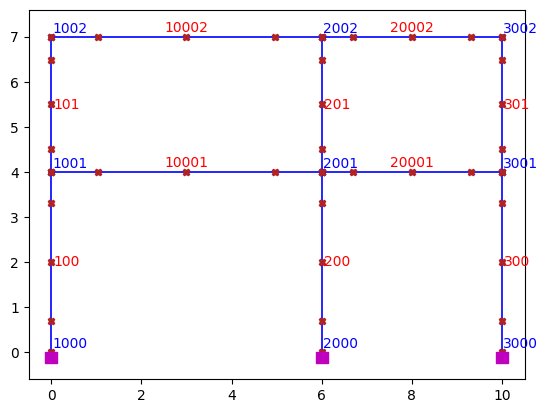

In [8]:
an.gravedad()
loadConst('-time',0.0)
opsv.plot_model()
opsv.plot_loads_2d(sfac=0.7)

### Pushover analysis (see other examples for other types of analyses)

#### opseestools has a function named pushover2 which simplifies the pushover process

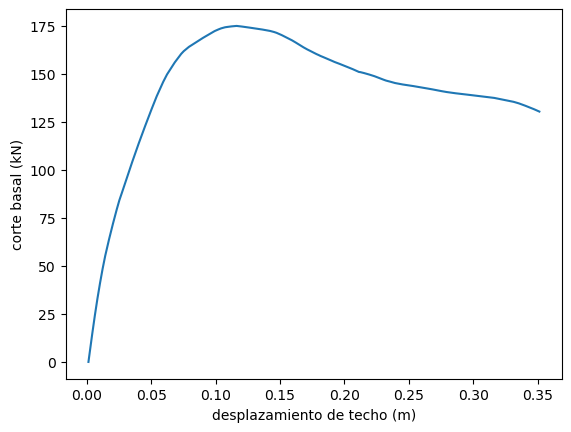

In [9]:
timeSeries('Linear', 2)
pattern('Plain',2,2)
load(1001,1/3,0.0,0.0)
load(1002,2/3,0.0,0.0)
dtecho,Vbasal = an.pushover2(0.05*coordy[-1],0.001,getNodeTags()[-1],1)